In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

pd.set_option('max_columns', None)

In [4]:
data = pd.read_csv('/content/Drug_Consumption_Quantified.csv')
data = data.drop('ID', axis=1)
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
#Check for missing values
data.isna().sum().sum()

0

In [6]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1884 rows and 31 columns


In [7]:
#Those who are overclaimers of drug use
data.query("Semer != 'CL0'")

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [8]:
# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [9]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [10]:
drugs = ['Alcohol','Amyl','Amphet','Benzos','Caff','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine',
         'VSA']

In [11]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [12]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [13]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,0,7,4,3,0,4,0,2,0,2,3,0,4,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,0,7,3,0,0,0,0,0,0,0,0,1,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,6,2,2,0,0,0,2,0,0,0,0,2,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,7,3,0,0,1,0,0,1,0,0,2,2,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7,0


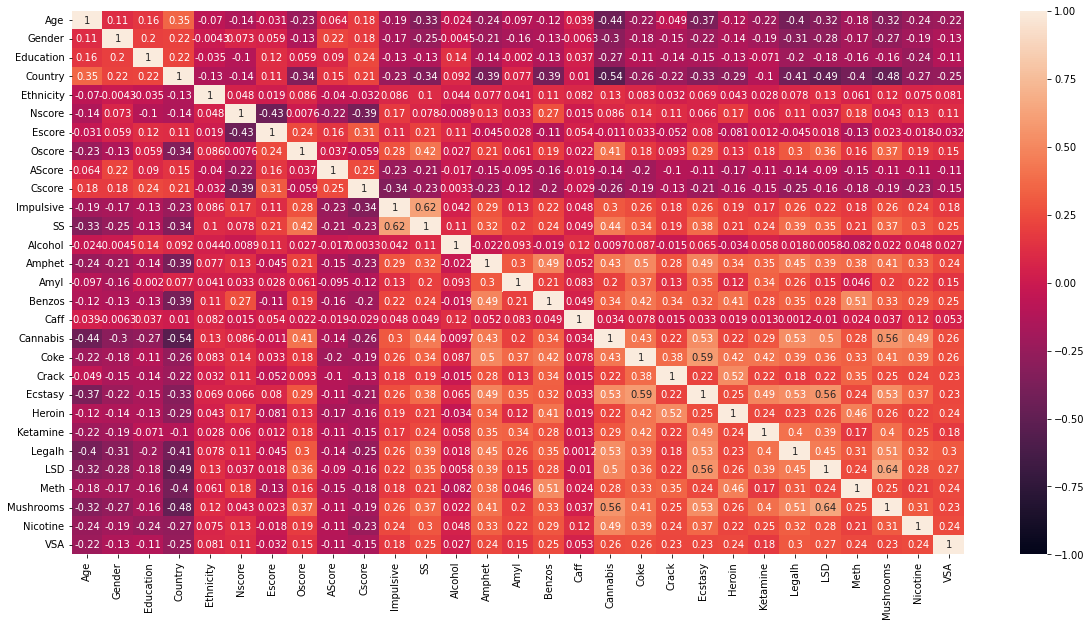

In [14]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [15]:
low_corr = ['Age', 'Gender', 'Education', 'Alcohol','AScore','Caff']
for column in low_corr:
    data = data.drop(column, axis=1)
data.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0
1,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0
2,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,3,2,2,0,0,0,2,0,0,0,0,2,0
3,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,0,3,0,0,1,0,0,1,0,0,2,2,0
4,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0


In [16]:
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1876 rows and 23 columns


In [17]:
# Combine cocaine and crack cocaine usage into one feature
cocaine_df = data.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [18]:
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [19]:
heroin_df = data.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [20]:
nic_df = data.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [21]:
cocaine_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0,1


In [22]:
meth_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,0,4,0,1


In [23]:
heroin_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,2,0,2,3,0,4,0,0


In [24]:
nic_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,0,1


# PROCESAMIENTO DE DATASETS

In [25]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
    

In [26]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

# MODELOS 

**CONSUMO DE COCAINA**

In [27]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [28]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1500, 23) (1500,)
Test set: (376, 23) (376,)


In [29]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [31]:
print('          ACCURACY   TRAIN')
for name, model in models.items():
    yhatT = model.predict(X_train)
    acc = accuracy_score(y_train, yhatT)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')

print('            ACCURACY TEST')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

          ACCURACY   TRAIN
     Logisitc Regression Accuracy: 100.00%
        Ridge Classifier Accuracy: 99.53%
 Support Vector Machines Accuracy: 100.00%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
            ACCURACY TEST
     Logisitc Regression Accuracy: 100.00%
        Ridge Classifier Accuracy: 99.20%
 Support Vector Machines Accuracy: 99.73%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 1.0
        Ridge Classifier F1-Score: 0.98885
 Support Vector Machines F1-Score: 0.99631
Random Forest Classifier F1-Score: 1.0


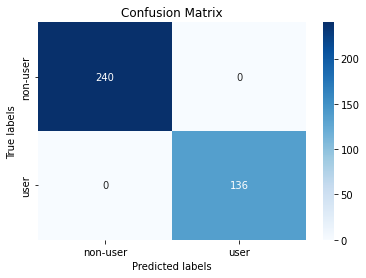

In [32]:
#Matriz de confusion para el mejor modelo consumidor de cocaina
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

#Random Forest

**CONSUMO DE MENTAFETAMINA**

In [61]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [62]:
print('          ACCURACY   TRAIN')
for name, model in models.items():
    yhatT = model.predict(X_train)
    acc = accuracy_score(y_train, yhatT)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')

print('            ACCURACY TEST')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

          ACCURACY   TRAIN
     Logisitc Regression Accuracy: 86.13%
        Ridge Classifier Accuracy: 85.40%
 Support Vector Machines Accuracy: 91.07%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
            ACCURACY TEST
     Logisitc Regression Accuracy: 84.84%
        Ridge Classifier Accuracy: 85.37%
 Support Vector Machines Accuracy: 84.57%
Random Forest Classifier Accuracy: 85.37%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.6014
        Ridge Classifier F1-Score: 0.60432
 Support Vector Machines F1-Score: 0.56716
Random Forest Classifier F1-Score: 0.59259


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier w

Valor óptimo de n_estimators: 141


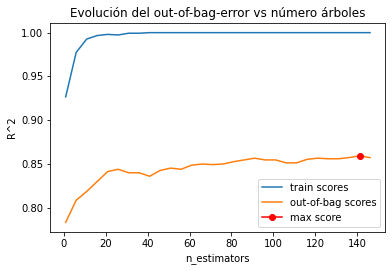

In [78]:
from sklearn.metrics import mean_squared_error
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'gini',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Valor óptimo de max_features: 8


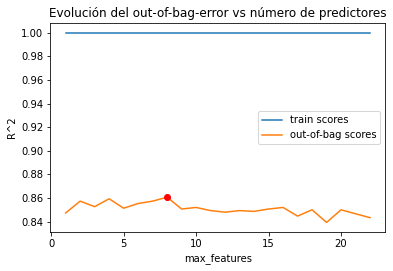

In [85]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestClassifier(
                n_estimators = 141,
                criterion    = 'gini',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


 Accuracy: 86.97%


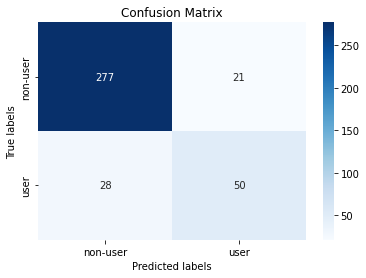

In [86]:
model = RandomForestClassifier(
                n_estimators = 141,
                criterion    = 'gini',
                max_depth    = None,
                max_features = 8,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

yhat = model.predict(X_test)
acc = accuracy_score(y_test, yhat)
print(' Accuracy: {:.2%}'.format(acc))

#SVM

**HEROINA**

In [90]:
X_train, X_test, y_train, y_test = preprocessing_inputs(heroin_df, 'Heroin_User')

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [91]:
print('          ACCURACY   TRAIN')
for name, model in models.items():
    yhatT = model.predict(X_train)
    acc = accuracy_score(y_train, yhatT)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')

print('            ACCURACY TEST')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

          ACCURACY   TRAIN
     Logisitc Regression Accuracy: 93.07%
        Ridge Classifier Accuracy: 92.40%
 Support Vector Machines Accuracy: 96.20%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
            ACCURACY TEST
     Logisitc Regression Accuracy: 90.96%
        Ridge Classifier Accuracy: 90.16%
 Support Vector Machines Accuracy: 91.76%
Random Forest Classifier Accuracy: 91.22%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.54054
        Ridge Classifier F1-Score: 0.46377
 Support Vector Machines F1-Score: 0.56338
Random Forest Classifier F1-Score: 0.56


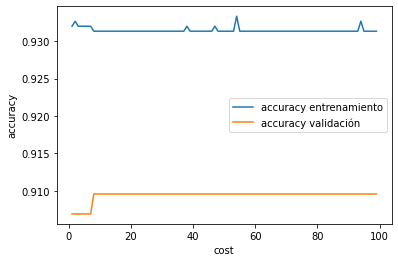

In [100]:
accu_entre=[] #crear vectores vacios para almacenar los accuracys al paso de las iteraciones
accu_val=[]

Cost= range (1, 100)

for Ct in Cost: #actualiza el numero de vecinos para cada entrenamiento

  modelSVM=SVC(C=Ct, kernel='linear')
  modelSVM.fit(X_train,y_train)

  accu_entre.append(modelSVM.score(X_train,y_train)) #guardar los accuracy para entrenamiento y validacion de cada modelo
  accu_val.append(modelSVM.score(X_test,y_test))

plt.plot(Cost,accu_entre,label="accuracy entrenamiento")
plt.plot(Cost,accu_val,label="accuracy validación")
plt.ylabel("accuracy")
plt.xlabel("cost")
plt.legend()


 Accuracy: 90.96%


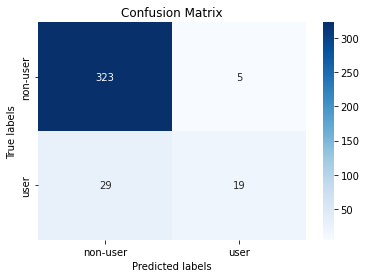

In [101]:
model = SVC(C = 20, kernel = 'linear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

yhat = model.predict(X_test)
acc = accuracy_score(y_test, yhat)
print(' Accuracy: {:.2%}'.format(acc))

# Ridge classifier

**NICOTINA**

In [123]:
X_train, X_test, y_train, y_test = preprocessing_inputs(nic_df, 'Nicotine_User')

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [124]:
print('          ACCURACY   TRAIN')
for name, model in models.items():
    yhatT = model.predict(X_train)
    acc = accuracy_score(y_train, yhatT)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')

print('            ACCURACY TEST')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

          ACCURACY   TRAIN
     Logisitc Regression Accuracy: 77.80%
        Ridge Classifier Accuracy: 78.07%
 Support Vector Machines Accuracy: 80.80%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
            ACCURACY TEST
     Logisitc Regression Accuracy: 78.46%
        Ridge Classifier Accuracy: 78.46%
 Support Vector Machines Accuracy: 79.79%
Random Forest Classifier Accuracy: 79.79%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.83636
        Ridge Classifier F1-Score: 0.83636
 Support Vector Machines F1-Score: 0.84861
Random Forest Classifier F1-Score: 0.85328


In [130]:
#cross validation kfold

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_train = grid_search.fit(X_train, y_train)
grid_result_val = grid_search.fit(X_test, y_test)

# summarize results train
print(         "ENTRENAMIENTO")
print("Best: %f using %s" % (grid_result_train.best_score_, grid_result_train.best_params_))
means = grid_result_train.cv_results_['mean_test_score']
stds = grid_result_train.cv_results_['std_test_score']
params = grid_result_train.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# summarize results  val
print("-----------------------")
print(         "VALIDACION")
print("Best: %f using %s" % (grid_result_val.best_score_, grid_result_val.best_params_))
means = grid_result_val.cv_results_['mean_test_score']
stds = grid_result_val.cv_results_['std_test_score']
params = grid_result_val.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ENTRENAMIENTO
Best: 0.786510 using {'alpha': 0.2}
0.785609 (0.071029) with: {'alpha': 0.1}
0.786510 (0.071172) with: {'alpha': 0.2}
0.786510 (0.071172) with: {'alpha': 0.3}
0.786510 (0.071172) with: {'alpha': 0.4}
0.786510 (0.071172) with: {'alpha': 0.5}
0.786510 (0.071172) with: {'alpha': 0.6}
0.786510 (0.071172) with: {'alpha': 0.7}
0.786510 (0.071172) with: {'alpha': 0.8}
0.786510 (0.071172) with: {'alpha': 0.9}
0.786510 (0.071172) with: {'alpha': 1.0}
-----------------------
VALIDACION
Best: 0.786510 using {'alpha': 0.2}
0.785609 (0.071029) with: {'alpha': 0.1}
0.786510 (0.071172) with: {'alpha': 0.2}
0.786510 (0.071172) with: {'alpha': 0.3}
0.786510 (0.071172) with: {'alpha': 0.4}
0.786510 (0.071172) with: {'alpha': 0.5}
0.786510 (0.071172) with: {'alpha': 0.6}
0.786510 (0.071172) with: {'alpha': 0.7}
0.786510 (0.071172) with: {'alpha': 0.8}
0.786510 (0.071172) with: {'alpha': 0.9}
0.786510 (0.071172) with: {'alpha': 1.0}


 Accuracy: 78.46%


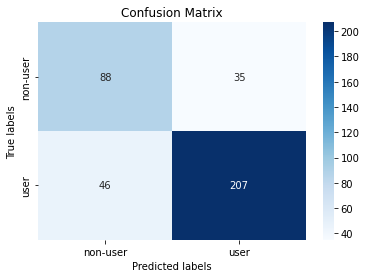

In [129]:
model = RidgeClassifier(alpha=0.2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

yhat = model.predict(X_test)
acc = accuracy_score(y_test, yhat)
print(' Accuracy: {:.2%}'.format(acc))

**REFERENCIAS**

https://rpubs.com/Joaquin_AR/267926


https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/